In [290]:
import pandas as pd
df = pd.read_csv("data.csv")
df.describe()


,Roll No.,Cgpa
count,4.000000,2.000000
mean,2.500000,8.000000
std,1.290994,1.414214
min,1.000000,7.000000
25%,1.750000,7.500000
50%,2.500000,8.000000
75%,3.250000,8.500000
max,4.000000,9.000000


In [291]:
df.tail()


,Roll No.,Name,Branch,Cgpa
0,1,Mohit,Cse,7.0
1,2,Mahith,Cse,9.0
2,3,Guna Sekhar,8,NaN
3,4,Lokesh,8.5,NaN


In [292]:
df.head()


,Roll No.,Name,Branch,Cgpa
0,1,Mohit,Cse,7.0
1,2,Mahith,Cse,9.0
2,3,Guna Sekhar,8,NaN
3,4,Lokesh,8.5,NaN


In [293]:
df_excel = pd.read_excel("Book.xlsx")
print(df_excel.head())
print(df_excel.tail())
df_excel.describe()

   Roll         Name Branch  Cgpa
0     1        Mohit    CSE     7
1     2  Guna Sekhar    CSE     8
2     3       Mahith    CSE     9
   Roll         Name Branch  Cgpa
0     1        Mohit    CSE     7
1     2  Guna Sekhar    CSE     8
2     3       Mahith    CSE     9


,Roll,Cgpa
count,3.0,3.0
mean,2.0,8.0
std,1.0,1.0
min,1.0,7.0
25%,1.5,7.5
50%,2.0,8.0
75%,2.5,8.5
max,3.0,9.0


In [294]:
df_json = pd.read_json("students.json")
print(df_json.head())
df_json.tail()

                                    students
0    {'Name': 'Mohit', 'Roll': '21131a05a4'}
1   {'Name': 'Mahith', 'Roll': '21131a0581'}
2  {'Name': 'Gowtham', 'Roll': '21131a05d2'}
3   {'Name': 'Lokesh', 'Roll': '21131a0587'}


,students
0,"{'Name': 'Mohit', 'Roll': '21131a05a4'}"
1,"{'Name': 'Mahith', 'Roll': '21131a0581'}"
2,"{'Name': 'Gowtham', 'Roll': '21131a05d2'}"
3,"{'Name': 'Lokesh', 'Roll': '21131a0587'}"


In [295]:
import zipfile
data = zipfile.ZipFile("sample.txt.zip", "r")
data1 = data.read("sample.txt")
data1

b'Python has a crucial role in machine learning because Python provides libraries like NumPy, \nPandas, Scikit-learn, TensorFlow, and Keras. These libraries offer tools and functions essential \nfor data manipulation, analysis, and building machine learning models. It is well-known for its \nreadability and offers platform independence. These all things make it the perfect language of \nchoice for Machine Learning.'

In [296]:
with open("sample.txt", "r") as f:
    print(f.read())

Python has a crucial role in machine learning because Python provides libraries like NumPy, 
Pandas, Scikit-learn, TensorFlow, and Keras. These libraries offer tools and functions essential 
for data manipulation, analysis, and building machine learning models. It is well-known for its 
readability and offers platform independence. These all things make it the perfect language of 
choice for Machine Learning.


In [297]:
import pandas as pd
import numpy as np 
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swarooplenka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [298]:
data = ["Python is object language",
        "java is class defined program",
        "modular is fastest language for LLMs",
        "dsa is an important concept"]
labels = ["python", "java", "modular", "dsa"]
data = np.array(data)
df = pd.DataFrame({"Document":data, "Category":labels})
data_df = df[['Document', 'Category']]
data_df

,Document,Category
0,Python is object language,python
1,java is class defined program,java
2,modular is fastest language for LLMs,modular
3,dsa is an important concept,dsa


In [299]:
# tokenize , remove stopwords
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    doc = re.sub(r'[^a-zA-Z0-9\s]','', doc, re.I)
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc
normalize_data = np.vectorize(normalize_document)
norm_data = normalize_data(data)
norm_data



array(['python object language', 'java class defined program',
       'modular fastest language llms', 'dsa important concept'],
      dtype='<U29')

In [300]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_data)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [301]:
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns=vocab)


,class,concept,defined,dsa,fastest,important,java,language,llms,modular,object,program,python
0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,1,1,1,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0


In [302]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [303]:
diabetes = datasets.load_diabetes()
print("Features: ", diabetes.feature_names)
data = diabetes.data[:, 2]
label = diabetes.target
data = np.array(data)
df = pd.DataFrame({"BMI": data, "diabetes": label})
df


Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,BMI,diabetes
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
...,...,...
437,0.019662,178.0
438,-0.015906,104.0
439,-0.015906,132.0
440,0.039062,220.0


In [304]:
# splitting 
diabetes_X  = diabetes.data[:, np.newaxis, 2]

diabetes_X_train = diabetes_X[:-30]
diabetes_Y_train = diabetes.target[:-30]


diabetes_X_test = diabetes_X[-20:]
diabetes_Y_test = diabetes.target[-20:]

model = linear_model.LinearRegression()
model.fit(diabetes_X_train, diabetes_Y_train)

print(model.coef_)
print(model.intercept_)


[941.43097333]
153.39713623331644


In [305]:
diabetes_Y_predict = model.predict(diabetes_X_test)
print(diabetes_Y_predict)
print(mean_squared_error(diabetes_Y_test, diabetes_Y_predict))

[226.70014103 116.09940303 163.78962951 115.08471736 121.17283138
 158.71620116 236.84699773 122.18751705  99.86443231 124.21688839
 205.39174197  96.8203753  154.65745848 131.31968807  83.62946159
 171.90711487 138.42248776 138.42248776 190.17145692  84.64414726]
2561.3204277283858


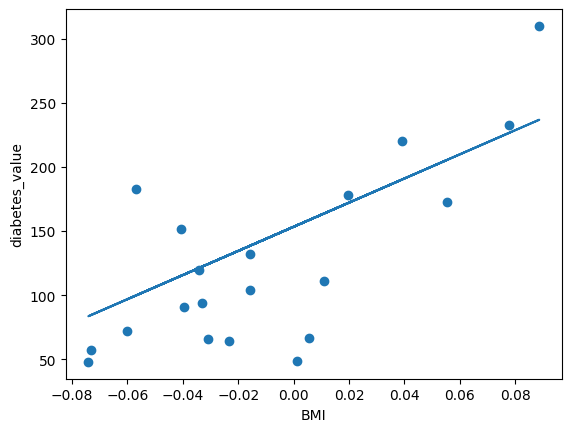

In [306]:
plt.xlabel("BMI")
plt.ylabel("diabetes_value")
plt.scatter(diabetes_X_test, diabetes_Y_test)
plt.plot(diabetes_X_test, diabetes_Y_predict)
plt.show()